# Newton-R For GLM
Author: Smooth  
Date: 2018.9.15

## The Model
The basic model is $y=X\beta$  
The nural link is $h_\beta(X)=X\beta$  
Based on the least squre, the loss function  
\begin{equation}
\begin{aligned}
f(\beta)&=||X\beta-y||_2\\
\\
&=(X\beta-y)^T(X\beta-y)
\end{aligned}
\end{equation}  
  
The gradient is   
\begin{equation}
\begin{aligned}
\frac{\partial f(\beta)}{\partial \beta}&=\frac{\partial (X\beta-y)^T(X\beta-y)}{\partial \beta}\\
&=2\frac{\partial (X\beta-y)^T}{\partial \beta}(X\beta-y)\\
\\
&=2X^T(X\beta-y)\\
\\
&=2X^TX\beta-2X^Ty
\end{aligned}
\end{equation}  
  
The Hession Matrix is
\begin{equation}
\begin{aligned}
\frac{\partial^2 f(\beta)}{\partial \beta \beta^T}&=\frac{\partial 2X^TX\beta-2X^Ty}{\partial \beta}\\
&=2X^TX
\end{aligned}
\end{equation}  

In [1]:
__author__ = 'Smooth'

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def p(A, B):
    return np.dot(A, B)

class Newton_R(object):
    def __init__(self, niters = 100, intercept = True, tol = 1e-5):
        self.niters = niters
        self.tol = tol
        self.intercept = intercept
        
    def print_res(self):
        s = ("%s(niters = %s, intercept = %s, tol = %s)\n"
                              % (self.__class__.__name__, self.niters, self.intercept, self.tol))
        print s
        return s
    
    def fit(self, X, y, beta_init = None, verbose = 1):
        self.n, p = X.shape
        if self.intercept:
            self.p = p + 1
            beta = np.zeros(self.p).reshape(-1, 1)
            X = np.append(np.ones((self.n, 1)), X, axis = 1)
        else:
            self.p = p 
            beta = np.zeros(self.p).reshape(-1, 1)
        
        if not beta_init is None:
            for i in np.arange(len(beta_init)):
                beta[i] = beta_init[i]
                
        niter = 1
        tol = np.inf
        while 1:
            g = self._derivative(X, y, beta)
            H = self._Hessian(X, beta)
            beta_new = beta - np.dot(np.linalg.inv(H), g)

            if verbose:
                print("iteration %s:\n %s" % (niter, str(beta_new.reshape(-1))))
        
            tol = np.sqrt(np.sum((beta_new - beta) ** 2))
            if tol < self.tol or niter >= self.niters:
                self.coefs_ = beta_new
                break
            else:
                niter += 1
                beta = beta_new
           
        self.niter = niter
        
        print("\n")
        if self.niter < self.niters:
            print("Converge!")
        else:
            print("Not converge!")
        print("iteration %s: %s" % (niter, str(self.coefs_.reshape(-1))))
        
        print 
        return self.coefs_

In [3]:
class GLM(Newton_R):
    def __init__(self, niters = 200, intercept = True, tol = 1e-5):
        super(GLM, self).__init__(niters = niters, intercept = intercept, tol = tol)
    
    def _derivative(self, X, y, beta):
#         gradient = 2*p(X.T, X)*beta + 2*p(X.T, y)
        gradient = np.zeros((self.p, 1))
        for i in np.arange(self.n):
            pi = np.sum(X[i].T * beta.T)
            gradient +=2 * (pi - y[i]) * X[i].reshape(-1, 1)
        return gradient
    
    def _Hessian(self, X, beta):
#         Hessian = 2*p(X.T,X)
        Hessian = np.zeros((self.p, self.p))
        for i in np.arange(self.n):
            Hessian += np.dot(X[i].reshape(-1, 1), X[i].reshape(1, -1)) #*pi * (1 - pi)
        return 2*Hessian  

## Simulation 1

processing...

iteration 1:
 [  0.49948021  88.39415529]
iteration 2:
 [  0.49948021  88.39415529]


Converge!
iteration 2: [  0.49948021  88.39415529]

GLM(niters = 200, intercept = True, tol = 1e-05)



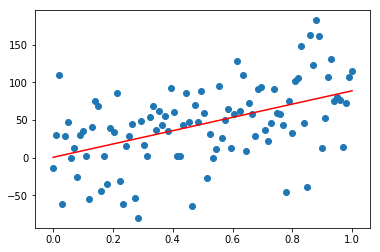

In [4]:
if __name__ == '__main__':    
    
    # Simulation 1
    
    sampleNo = 100
    mu = 0
    sigma = 50
    np.random.seed(2018)
    X = np.linspace(0, 1, 100).reshape([100,1])
    y = sigma * np.random.randn(sampleNo ) + mu + np.linspace(0, 100, 100)

    glm_model = GLM()
    print 'processing...\n'
    s = glm_model.fit(X,y)
    glm_model.print_res()
    x = np.linspace(0, 1, 1000)

    y_hat = s[0]+s[1]*x
    plt.scatter(X,y)
    plt.plot(x, y_hat, 'r')
    plt.show()

## Simulation 2

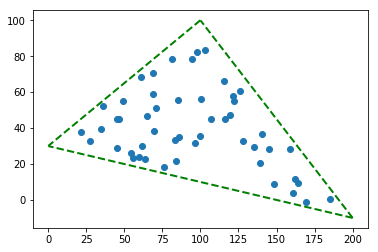

processing...

iteration 1:
 [ 56.92557925  -0.17898794]
iteration 2:
 [ 56.92557925  -0.17898794]


Converge!
iteration 2: [ 56.92557925  -0.17898794]

GLM(niters = 200, intercept = True, tol = 1e-05)



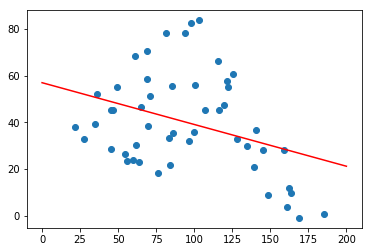

In [5]:
if __name__ == '__main__':
    
    # Simulation 2
    np.random.seed(20180921) 
    x1, y1 = 0, 30
    x3, y3 = 200, -10
    x2, y2 = 100, 100
    sample_size = 50
    theta = np.arange(0,1,0.001)
    X = theta * x1 + (1 - theta) * x2
    y = theta * y1 + (1 - theta) * y2
    plt.plot(X,y,'g--',linewidth=2)
    X = theta * x1 + (1 - theta) * x3
    y = theta * y1 + (1 - theta) * y3
    plt.plot(X, y, 'g--', linewidth=2)
    X = theta * x2 + (1 - theta) * x3
    y = theta * y2 + (1 - theta) * y3
    plt.plot(X, y, 'g--', linewidth=2)
    rnd1 = np.random.random(size = sample_size)
    rnd2 = np.random.random(size=sample_size)
    rnd2 = np.sqrt(rnd2)
    X = rnd2 * (rnd1 * x1 + (1 - rnd1) * x2) + (1 - rnd2) * x3
    y = rnd2 * (rnd1 * y1 + (1 - rnd1) * y2) + (1 - rnd2) * y3
    
    X = X.reshape([50,1])
    y = y
    plt.scatter(X,y)
    plt.show()
    
    glm_model = GLM()
    print 'processing...\n'
    s = glm_model.fit(X,y)
    glm_model.print_res()
    x = np.linspace(0, 200, 1000)

    y_hat = s[0]+s[1]*x
    plt.scatter(X,y)
    plt.plot(x, y_hat, 'r')
    plt.show()

In [6]:
class GLM(Newton_R):
    def __init__(self, niters = 100, intercept = True, tol = 1e-5):
        super(GLM, self).__init__(niters = niters, intercept = intercept, tol = tol)
    
    def _derivative(self, X, y, beta):
        gradient = 2*p(X.T, X)*beta + 2*p(X.T, y)
        return gradient
    
    def _Hessian(self, X, beta):
        Hessian = 2*p(X.T,X)
        return Hessian  

## Real data1

Data Set Information:
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Number of instances 1030 
Number of Attributes	9 
Attribute breakdown	8 quantitative input variables, and 1 quantitative output variable 
Missing Attribute Values	None 


Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

In [7]:
import pandas as pd

dat = pd.read_table('Concrete_Data.csv', sep=',')
y = np.array(np.mat(dat)[:,8]).T[0]
X = np.mat(dat)[:,1:8]

glm_model = GLM()
print 'processing...\n'
s = glm_model.fit(X,y)
res = glm_model.print_res()

processing...

iteration 1:
 [[ -5.99134192e+04  -4.75210827e+06  -3.05766779e+06  -1.07056536e+07
   -4.32793784e+05  -5.79328846e+07  -4.59735217e+07  -3.31574486e+06
    8.05070782e+00   6.38552026e+02   4.10866052e+02   1.43854399e+03
    5.81555242e+01   7.78457870e+03   6.17757083e+03   4.45544477e+02
    2.17273850e+00   1.72333490e+02   1.10885218e+02   3.88236659e+02
    1.56951102e+01   2.10091513e+03   1.66721316e+03   1.20244289e+02
    1.10887610e+02   8.79519041e+03   5.65912410e+03   1.98139976e+04
    8.01013680e+02   1.07222042e+05   8.50876820e+04   6.13677250e+03
    2.73365045e+02   2.16822927e+04   1.39511232e+04   4.88463438e+04
    1.97469438e+03   2.64328523e+05   2.09761920e+05   1.51286432e+04
    2.30145782e+01   1.82543025e+03   1.17454379e+03   4.11236923e+03
    1.66249340e+02   2.22537943e+04   1.76598369e+04   1.27367909e+03
    1.93344854e+01   1.53353905e+03   9.86731089e+02   3.45479036e+03
    1.39665624e+02   1.86953529e+04   1.48359816e+04   1.0700

## Real data2

Data Set Information: https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics

Prediction of residuary resistance of sailing yachts at the initial design stage is of a great value for evaluating the ship's performance and for estimating the required propulsive power. Essential inputs include the basic hull dimensions and the boat velocity. 

The Delft data set comprises 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory for that purpose. 
These experiments include 22 different hull forms, derived from a parent form closely related to the Standfast designed by Frans Maas. 


Attribute Information:

Variations concern hull geometry coefficients and the Froude number: 

1. Longitudinal position of the center of buoyancy, adimensional. 
2. Prismatic coefficient, adimensional. 
3. Length-displacement ratio, adimensional. 
4. Beam-draught ratio, adimensional. 
5. Length-beam ratio, adimensional. 
6. Froude number, adimensional. 

The measured variable is the residuary resistance per unit weight of displacement: 

7. Residuary resistance per unit weight of displacement, adimensional. 

In [8]:
dat = pd.read_table('dat.txt', sep='\s+')
y = np.array(np.mat(dat)[:,6]).T[0]
X = np.mat(dat)[:,1:6]

glm_model = GLM()
print 'processing...\n'
s = glm_model.fit(X,y)
res = glm_model.print_res()

processing...

iteration 1:
 [[  11651.90444922    6562.09845038   55784.13868511   45757.17036294
    37361.28698903    4721.88772392  -25142.72290923  -14159.83316377
  -120372.18017044  -98735.77839228  -80618.9658001   -10188.9880035
    -5425.28143883   -3055.40017753  -25973.8357372   -21305.14613688
   -17395.91134787   -2198.57362687    2435.09637507    1371.39316744
    11658.15892932    9562.65305553    7808.02270661     986.81307679
     5964.10325974    3358.85287501   28553.47508413   23421.10597519
    19123.61833126    2416.92901698    -734.62339485    -413.72387338
    -3517.05024      -2884.87499852   -2355.53557819    -297.70319564]]
iteration 2:
 [[  11651.90444921    6562.09845039   55784.13868508   45757.17036293
    37361.28698906    4721.88772392  -25142.72290922  -14159.83316378
  -120372.18017039  -98735.77839226  -80618.96580016  -10188.98800349
    -5425.28143883   -3055.40017753  -25973.83573718  -21305.14613687
   -17395.91134789   -2198.57362686    2435.09